In [30]:
# ライブラリのインポート
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import warnings # 実行に関係ない警告を無視
warnings.filterwarnings('ignore')
import lightgbm as lgb #LightGBM
import xgboost as xgb #xgboost
from catboost import CatBoost #catboost
from catboost import Pool
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)     
from sklearn.metrics import roc_auc_score # モデル評価用(auc)

In [ ]:
#3つのGBDTで予測

In [8]:
df = pd.read_csv('boston.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# 説明変数,目的変数
X = df.drop('CHAS',axis=1).values # 説明変数(target以外の特徴量)
y = df['CHAS'].values # 目的変数(target)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

In [10]:
#クラスの比率
n_target0, n_target1 = len(df[df['CHAS'] == 0]), len(df[df['CHAS'] == 1])
n_all = n_target0+n_target1
print('target0 の割合 :',n_target0/n_all) # target0(健常者)の割合
print('target1 の割合 :',n_target1/n_all) # target1(がん患者)の割合

target0 の割合 : 0.9308300395256917
target1 の割合 : 0.0691699604743083


In [11]:
#LightGBM
モデルの学習
model = lgb.LGBMClassifier() # モデルのインスタンスの作成
model.fit(X_train, y_train) # モデルの学習

# テストデータの予測クラス (予測クラス(0 or 1)を返す)
y_pred = model.predict(X_test)
# テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率] を返す)
y_pred_prob = model.predict_proba(X_test)

In [12]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'target':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1]})
display(df_pred_prob)

,target,target_pred
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


,target,target0_prob,target1_prob
0,0.0,0.999680,0.000320
1,1.0,0.984802,0.015198
2,0.0,0.994459,0.005541
3,0.0,0.997396,0.002604
4,0.0,0.999988,0.000012
5,0.0,0.996963,0.003037
6,0.0,0.995709,0.004291
7,0.0,0.998807,0.001193
8,0.0,0.999948,0.000052
9,0.0,0.996963,0.003037


In [13]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_pred_prob[:,1]) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9607843137254902
logloss : 0.16450013178360898
AUC : 0.9131944444444444


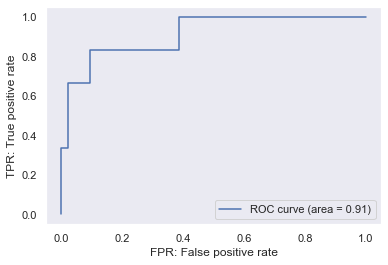

In [16]:
# ROC曲線の描画
# cf : https://tips-memo.com/python-roc
from sklearn import metrics
from sklearn.metrics import roc_curve
sns.set()
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [17]:
#LightGBM
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {
'task': 'train',
'boosting_type': 'gbdt',
'objective': 'binary', # 目的 : 2クラス分類
'metric': {'binary_error'}, # 評価指標 : 誤り率(= 1-正答率)
}

# モデルの学習
model = lgb.train(params,
train_set=lgb_train, # トレーニングデータの指定
valid_sets=lgb_eval, # 検証データの指定
)

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(X_test)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す

[1]	valid_0's binary_error: 0.0588235
[2]	valid_0's binary_error: 0.0588235
[3]	valid_0's binary_error: 0.0588235
[4]	valid_0's binary_error: 0.0588235
[5]	valid_0's binary_error: 0.0588235
[6]	valid_0's binary_error: 0.0588235
[7]	valid_0's binary_error: 0.0588235
[8]	valid_0's binary_error: 0.0588235
[9]	valid_0's binary_error: 0.0588235
[10]	valid_0's binary_error: 0.0588235
[11]	valid_0's binary_error: 0.0588235
[12]	valid_0's binary_error: 0.0588235
[13]	valid_0's binary_error: 0.0588235
[14]	valid_0's binary_error: 0.0490196
[15]	valid_0's binary_error: 0.0490196
[16]	valid_0's binary_error: 0.0490196
[17]	valid_0's binary_error: 0.0490196
[18]	valid_0's binary_error: 0.0490196
[19]	valid_0's binary_error: 0.0490196
[20]	valid_0's binary_error: 0.0588235
[21]	valid_0's binary_error: 0.0490196
[22]	valid_0's binary_error: 0.0490196
[23]	valid_0's binary_error: 0.0588235
[24]	valid_0's binary_error: 0.0588235
[25]	valid_0's binary_error: 0.0588235
[26]	valid_0's binary_error: 0.058

In [18]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})
display(df_pred)

# 真値と予測確率の表示
df_pred_prob = pd.DataFrame({'target':y_test, 'target0_prob':1-y_pred_prob, 'target1_prob':y_pred_prob})
display(df_pred_prob)

,target,target_pred
0,0.0,0
1,1.0,0
2,0.0,0
3,0.0,0
4,0.0,0
5,0.0,0
6,0.0,0
7,0.0,0
8,0.0,0
9,0.0,0


,target,target0_prob,target1_prob
0,0.0,0.999680,0.000320
1,1.0,0.984802,0.015198
2,0.0,0.994459,0.005541
3,0.0,0.997396,0.002604
4,0.0,0.999988,0.000012
5,0.0,0.996963,0.003037
6,0.0,0.995709,0.004291
7,0.0,0.998807,0.001193
8,0.0,0.999948,0.000052
9,0.0,0.996963,0.003037


In [19]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9607843137254902
logloss : 0.16450013178360898
AUC : 0.9131944444444444


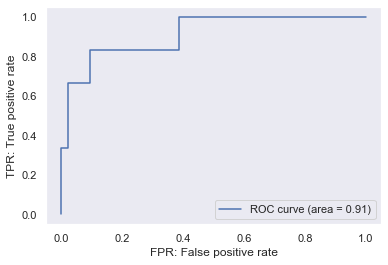

In [20]:
# ROC曲線の描画
# cf : https://tips-memo.com/python-roc
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [26]:
#xgboost
# 学習に使用するデータを設定
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_eval = xgb.DMatrix(X_test, label=y_test)

# 学習用のパラメータ
xgb_params = {
    # 二値分類問題
    'objective': 'binary:logistic',
    # 評価指標
    'eval_metric': 'logloss',
}

# モデルの学習
model = xgb.train(xgb_params,
        xgb_train,
        num_boost_round=100
)

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(xgb_eval)
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す

In [27]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9509803921568627
logloss : 0.17812422448282722
AUC : 0.907986111111111


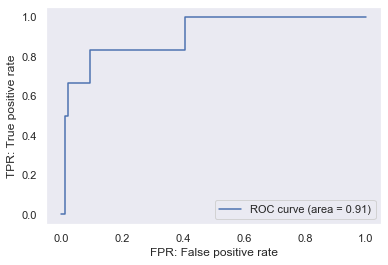

In [28]:
# ROC曲線の描画
# cf : https://tips-memo.com/python-roc
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()

In [39]:
#catboost
# 学習に使用するデータを設定
ctb_train = Pool(X_train, label=y_train)
ctb_eval = Pool(X_test, label=y_test)

# 学習用のパラメータ
ctb_params = {
    # 分類問題
    'loss_function': 'Logloss',
    #ラウンド数
    'num_boost_round': 100,
}

# モデルの学習
model = CatBoost(ctb_params)
model.fit(ctb_train)

# テストデータの予測 (クラス1の予測確率(クラス1である確率)を返す)
y_pred_prob = model.predict(ctb_eval, prediction_type='Class')
# テストデータの予測 (予測クラス(0 or 1)を返す)
y_pred = np.where(y_pred_prob < 0.5, 0, 1) # 0.5より小さい場合0 ,そうでない場合1を返す

Learning rate set to 0.057791
0:	learn: 0.6630510	total: 4.96ms	remaining: 491ms
1:	learn: 0.6319711	total: 7.16ms	remaining: 351ms
2:	learn: 0.6052654	total: 9.25ms	remaining: 299ms
3:	learn: 0.5799653	total: 11.5ms	remaining: 275ms
4:	learn: 0.5593158	total: 13.7ms	remaining: 261ms
5:	learn: 0.5379571	total: 15.9ms	remaining: 249ms
6:	learn: 0.5179518	total: 18.1ms	remaining: 240ms
7:	learn: 0.5010446	total: 20.1ms	remaining: 232ms
8:	learn: 0.4854120	total: 22.3ms	remaining: 225ms
9:	learn: 0.4687054	total: 24.3ms	remaining: 219ms
10:	learn: 0.4542076	total: 27.5ms	remaining: 222ms
11:	learn: 0.4410084	total: 30.3ms	remaining: 222ms
12:	learn: 0.4271643	total: 32.5ms	remaining: 218ms
13:	learn: 0.4146080	total: 34.8ms	remaining: 213ms
14:	learn: 0.4027033	total: 38.1ms	remaining: 216ms
15:	learn: 0.3931475	total: 40.3ms	remaining: 212ms
16:	learn: 0.3859650	total: 43.3ms	remaining: 212ms
17:	learn: 0.3760946	total: 45.7ms	remaining: 208ms
18:	learn: 0.3667617	total: 48.9ms	remaining

In [40]:
# モデル評価
# acc : 正答率
acc = accuracy_score(y_test,y_pred)
print('Acc :', acc)

# logloss 
logloss =  log_loss(y_test,y_pred_prob) # 引数 : log_loss(正解クラス,[クラス0の予測確率,クラス1の予測確率])
print('logloss :', logloss)

# AUC 
auc = roc_auc_score(y_test,y_pred_prob) # 引数 : roc_auc_score(正解クラス, クラス1の予測確率)
print('AUC :', auc) 

Acc : 0.9313725490196079
logloss : 2.370316023154951
AUC : 0.4947916666666667


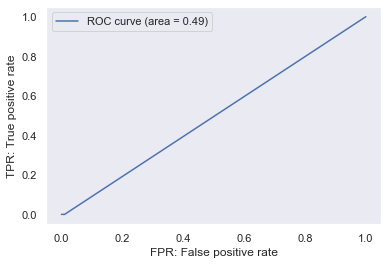

In [41]:
# ROC曲線の描画
# cf : https://tips-memo.com/python-roc
from sklearn import metrics
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()
plt.show()